In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df = df.dropna()

label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])


X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')


['/content/drive/MyDrive/scaler.pkl']

Epoch 1/550


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4882 - loss: 1.0409 - val_accuracy: 0.6601 - val_loss: 0.8470
Epoch 2/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 0.8421 - val_accuracy: 0.6798 - val_loss: 0.7792
Epoch 3/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.7724 - val_accuracy: 0.6798 - val_loss: 0.7459
Epoch 4/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 0.7336 - val_accuracy: 0.6847 - val_loss: 0.7182
Epoch 5/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 0.7530 - val_accuracy: 0.6798 - val_loss: 0.7172
Epoch 6/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6761 - loss: 0.7167 - val_accuracy: 0.6700 - val_loss: 0.7234
Epoch 7/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6529 - loss: 0.7332 - val_accuracy: 0.6847 - val_loss: 0.6997
Epoch 8/550
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.7383 - val_accuracy: 0.6700 - val_loss: 0.

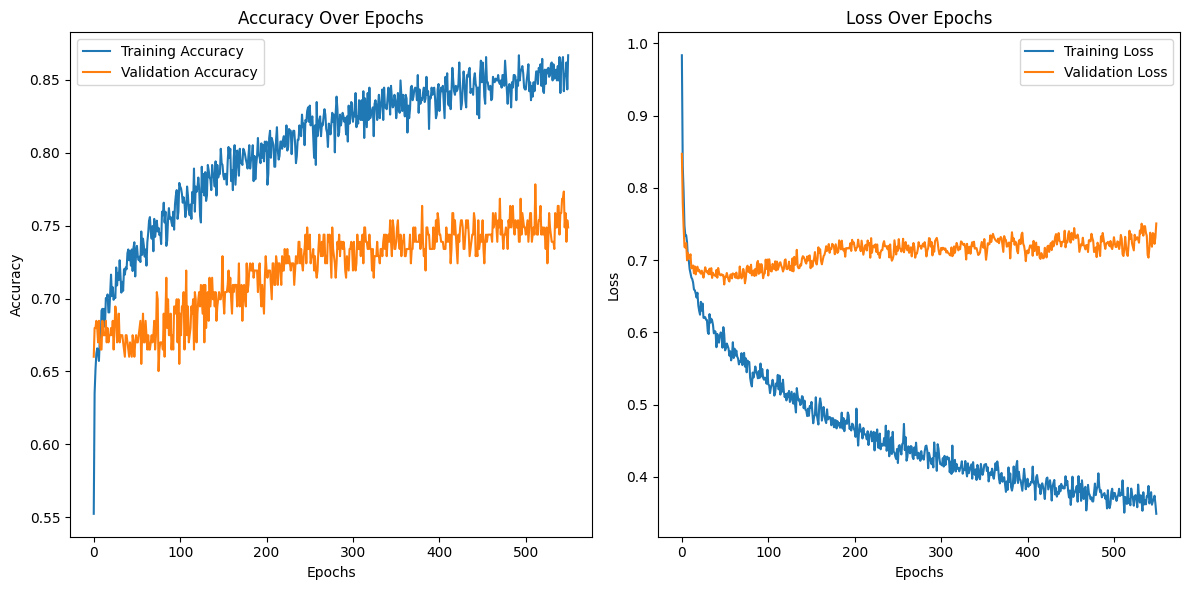

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.8262 
Test Accuracy: 74.88%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
=
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')


df = df.dropna()

label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=550, batch_size=32)


plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
# Example
new_data_batch = np.array([[18,90,60,7.5,98,70],
                          [50,140,90,15,98,90]])


new_data_batch_scaled = scaler.transform(new_data_batch)

predictions_batch = model.predict(new_data_batch_scaled)

predicted_classes_batch = np.argmax(predictions_batch, axis=1)

predicted_risk_levels_batch = label_encoder.inverse_transform(predicted_classes_batch)

for i, risk_level in enumerate(predicted_risk_levels_batch):
    print(f"Predicted Risk Level for Data Point {i+1}: {risk_level}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Risk Level for Data Point 1: low risk
Predicted Risk Level for Data Point 2: high risk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/maternalRiskPrediction.h5')
